In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
df=pd.read_csv('abalone_age_prediction.csv')

In [11]:
#Add age
df['age'] = df.Rings + 1.5
#Drop Rings
df.drop(['Rings'],axis=1,inplace=True) 

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Checking the shape of the dataset

In [14]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns

checking null values

In [15]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [17]:
# checking NA
df.isna().sum()

# No null and no NA values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [19]:
#unique values
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

In [20]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [21]:
#Variable separation

numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

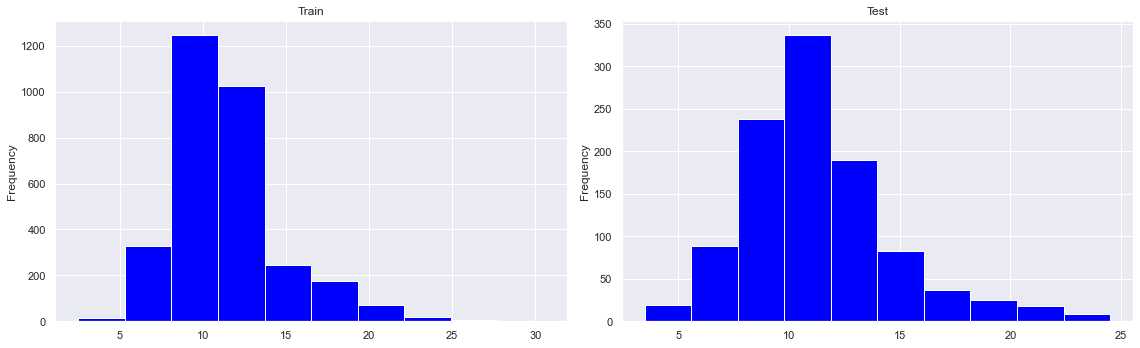

In [22]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

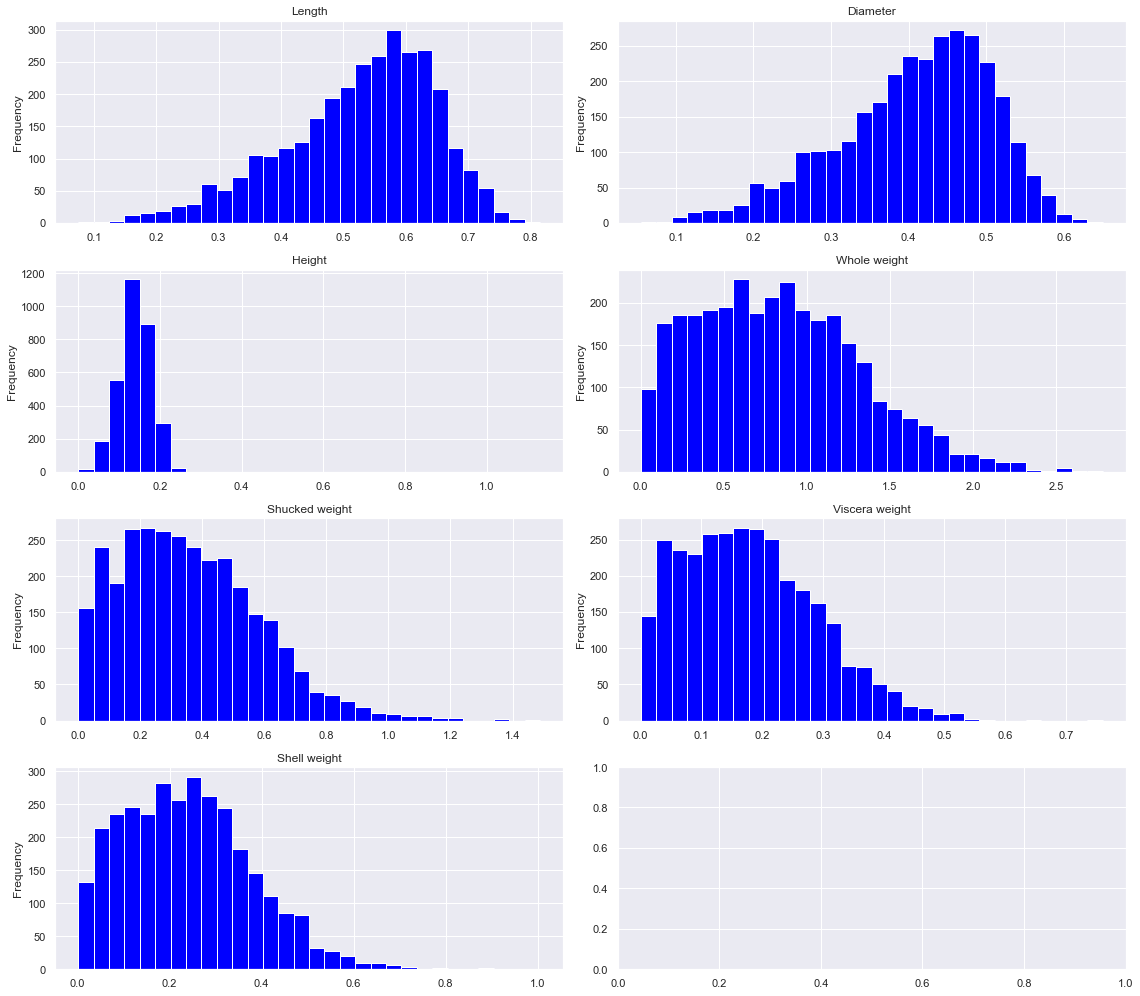

In [23]:
#Distribution of the numerical features:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

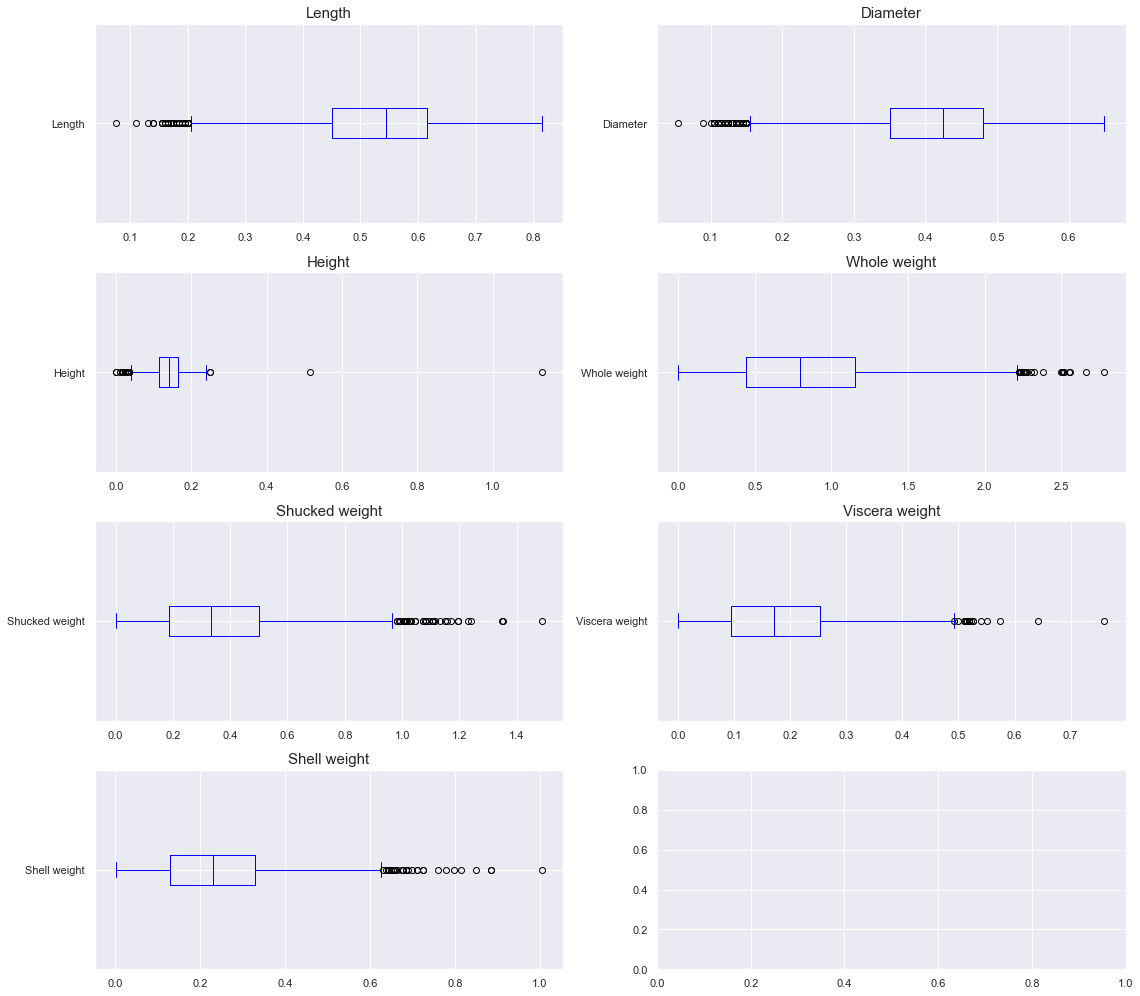

In [24]:
#Box Plot to check outliers:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers. Height feature has extreme outliers.

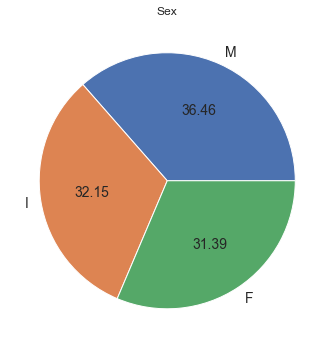

In [25]:
#Pie Chart for the categorical feature "Sex"
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

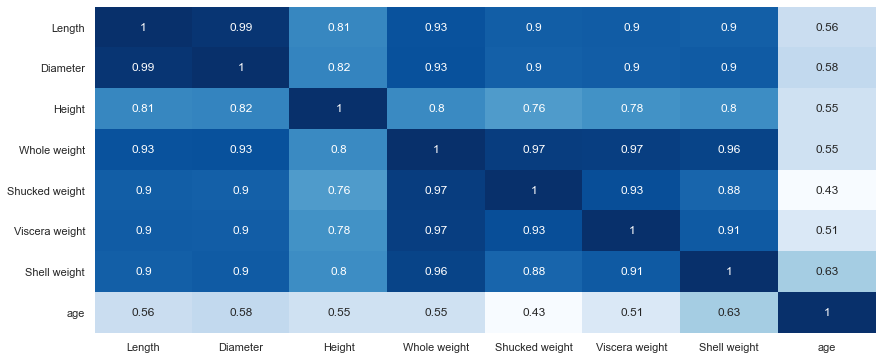

In [26]:
#Pearson Correlation
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()

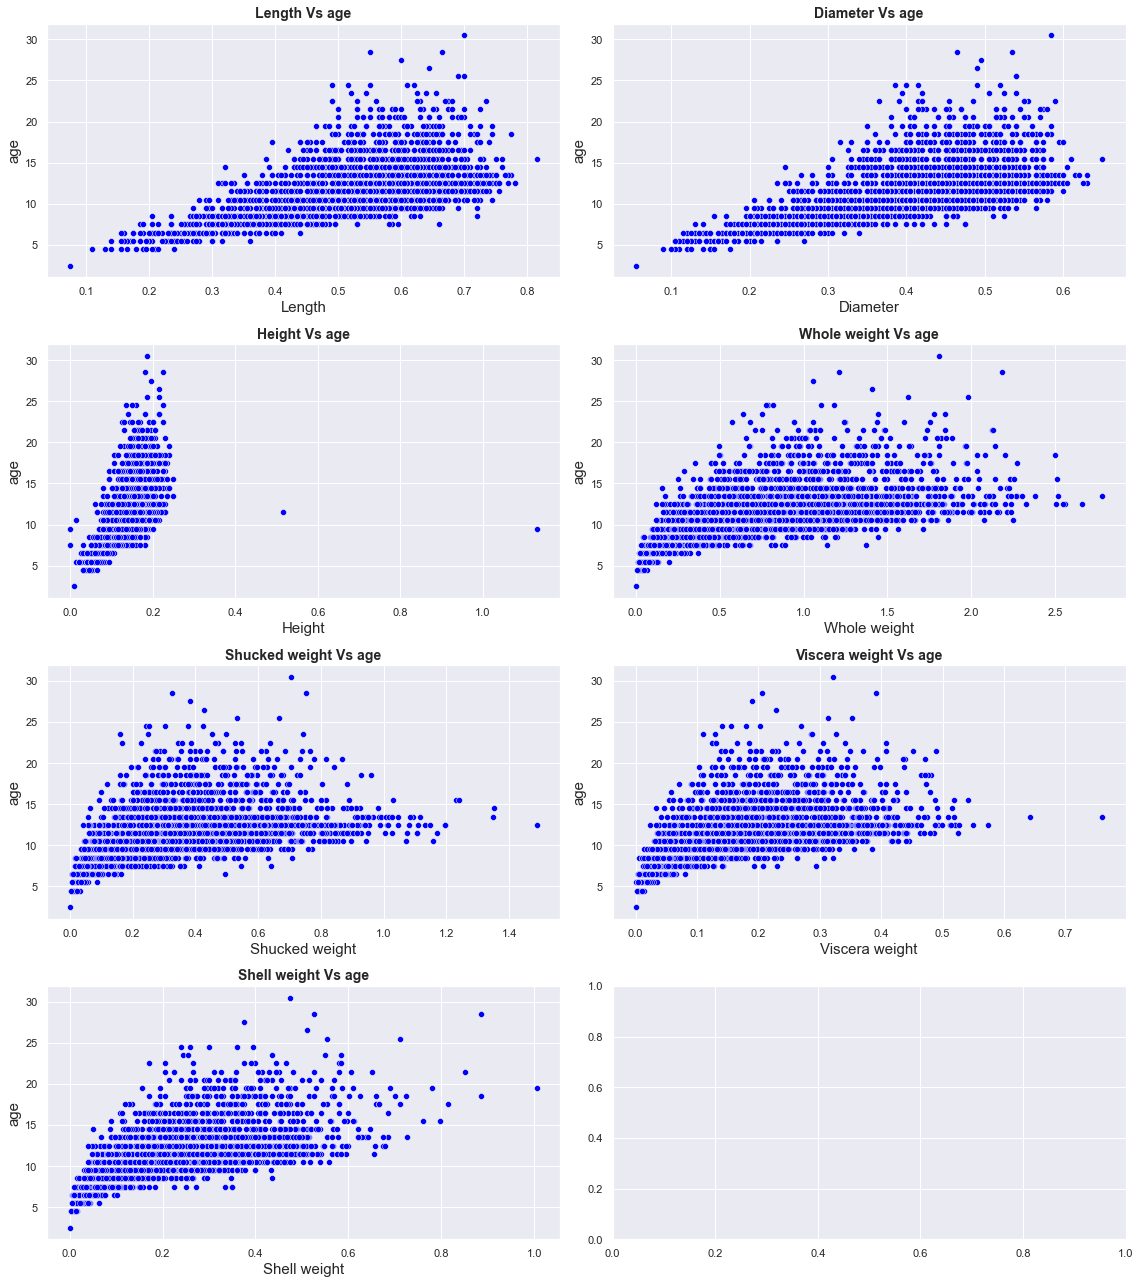

In [27]:
# Relation of all the features with target column scatter plot

fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c], y=train[target],ax=axes[i], color='blue')
    axes[i].set_title(f"{c} Vs age", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()


We can see that some features have linear relationship with the target "Age"

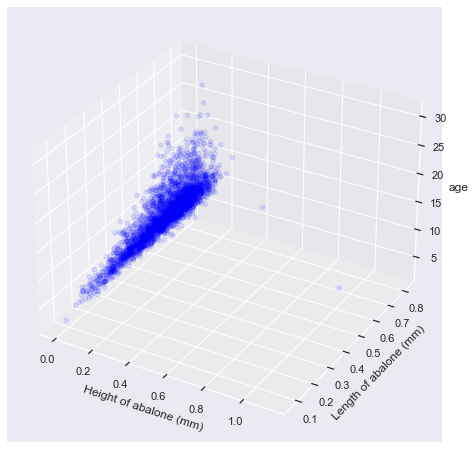

In [28]:
# Plotting Height vs Length vs Age
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'], train['Length'], train[target], c='blue', alpha=0.1);

plt.show()

In [29]:
#Label encoding

train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

In [30]:
#Removing outliers:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

In [31]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
4014,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.285,1
3252,0.480,0.380,0.130,0.6175,0.3000,0.1420,0.175,1
305,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.011,0
1857,0.505,0.400,0.145,0.7045,0.3340,0.1425,0.207,0
439,0.500,0.415,0.165,0.6885,0.2490,0.1380,0.250,1


Since it is a regression problem we can use the Root mean squared error as the performance metric.

In [32]:
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
        }

In [33]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [34]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n\n")

linear_regression
Train rmse :  2.1601637766834694
Test rmse :  2.1993326495103673



lasso
Train rmse :  3.1425445775484584
Test rmse :  3.2071190143034873



decision_tree
Train rmse :  0.0
Test rmse :  2.8672378052018894



random_forest
Train rmse :  0.7983734867135102
Test rmse :  2.1456051220373515





In [35]:
#Hyperparameter tuning
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}

In [36]:
params = [lr_params, lasso_params, dt_params, rf_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

linear_regression
Best params : {'fit_intercept': True}
RMSE : 2.1685158384088488

lasso
Best params : {'alpha': 0.0001}
RMSE : 2.168463202118033

decision_tree
Best params : {'min_samples_split': 40, 'max_leaf_nodes': 32, 'max_features': 0.8, 'max_depth': 6}
RMSE : 2.3129742105222477

random_forest
Best params : {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
RMSE : 2.116551654438409



Since Random Forest is performing better so it is selected

In [37]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

In [38]:
#save the model

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
#Evaluation

print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156


In [40]:
#Feature importance
df = pd.DataFrame([features, model.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

,feature,importance
6,Shell weight,0.247956
3,Whole weight,0.157105
2,Height,0.135278
5,Viscera weight,0.124763
4,Shucked weight,0.1204
1,Diameter,0.109247
0,Length,0.08051
7,Sex,0.024743


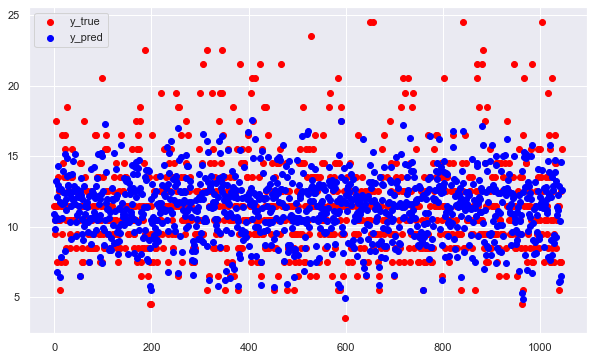

In [41]:
#Scatter plot
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

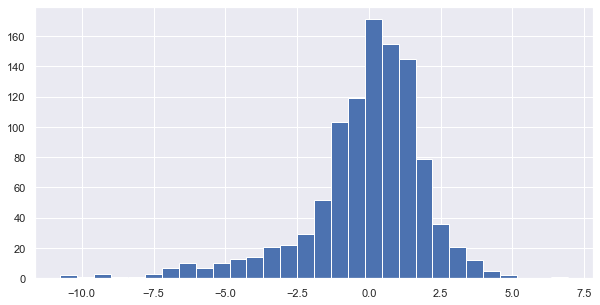

In [42]:
#Error distribution
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()